# Mask Detection

This Notebook uses [Face Mask Detection Dataset](https://www.kaggle.com/vijaykumar1799/face-mask-detection) from Kaggle to train a model with <b>Transfer Learning</b> that categorises the images into 3 categories:
- mask_weared_incorrectly
- with_mask
- without_mask

### About The Dataset

#### Context
Having seen multiple datasets related to face mask detection on Kaggle, one dataset which stood out contained 3 classes (with mask, without a mask, and wearing mask incorrectly), unfortunately, the dataset was highly imbalanced and uncleaned. So to improve this dataset, images had to be augmented in such a way that each class has an equal distribution of images and removing noisy images which could be considered as outliers. Thus this dataset that I've created is a combination of an existing dataset that has been cleaned and equally distributed across each class.

#### Content
The dataset contains 3 folders labeled as to which class they belong to. the 3 classes are "withmask", "withoumask", and "maskwearedincorrect". Each folder holds 2994 images of people that belong to such a labeled class.

## 1. Imports

In [26]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pathlib

## 2. Splitting Data

In [27]:
data_dir = pathlib.Path('./Dataset/')
img_height, img_width = 224, 224
batch_size=16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8982 files belonging to 3 classes.
Using 7186 files for training.
Found 8982 files belonging to 3 classes.
Using 1796 files for validation.


## 3. Visualizing Data

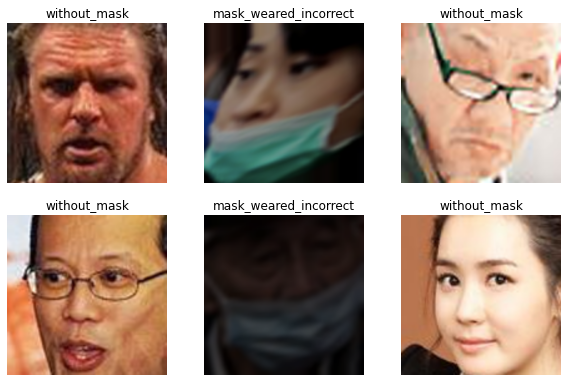

In [28]:
plt.figure(figsize=(10, 10))
tags = train_ds.class_names

for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(tags[labels[i].numpy()])
        plt.axis("off")

## 4. Building Model

In [29]:
model = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(img_height,img_width,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               655872    
                                                                 
 dense_4 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 2,915,395
Trainable params: 657,411
Non-trainable params: 2,257,984
_________________________________________________________________


## 5. Checking GPU Availabilty

In [31]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18017582142542651999
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2252026676
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3762628243767748391
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


## 6. Training Model

In [32]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

save_best = tf.keras.callbacks.ModelCheckpoint("MaskDetection.h5",monitor='val_accuracy',save_best_only=True, verbose=1)

history = model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=[save_best])

Epoch 1/10
449/450 [============================>.] - ETA: 0s - loss: 0.4143 - accuracy: 0.8342
Epoch 00001: val_accuracy improved from -inf to 0.88920, saving model to MaskDetection.h5


C:\Users\stdnt\Desktop\Mask Detection\venv\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


450/450 [==============================] - 23s 48ms/step - loss: 0.4142 - accuracy: 0.8343 - val_loss: 0.2930 - val_accuracy: 0.8892
Epoch 2/10
449/450 [============================>.] - ETA: 0s - loss: 0.2429 - accuracy: 0.9094
Epoch 00002: val_accuracy improved from 0.88920 to 0.90479, saving model to MaskDetection.h5
450/450 [==============================] - 20s 45ms/step - loss: 0.2429 - accuracy: 0.9094 - val_loss: 0.2398 - val_accuracy: 0.9048
Epoch 3/10
449/450 [============================>.] - ETA: 0s - loss: 0.1946 - accuracy: 0.9305
Epoch 00003: val_accuracy improved from 0.90479 to 0.91704, saving model to MaskDetection.h5
450/450 [==============================] - 21s 46ms/step - loss: 0.1945 - accuracy: 0.9306 - val_loss: 0.2148 - val_accuracy: 0.9170
Epoch 4/10
450/450 [==============================] - ETA: 0s - loss: 0.1598 - accuracy: 0.9445
Epoch 00004: val_accuracy improved from 0.91704 to 0.93931, saving model to MaskDetection.h5
450/450 [=========================

In [8]:
model.evaluate(val_ds)

113/113 [==============================] - 4s 36ms/step - loss: 0.0584 - accuracy: 0.9894


[0.058380138128995895, 0.9894209504127502]

## 7. Visualising Training Data

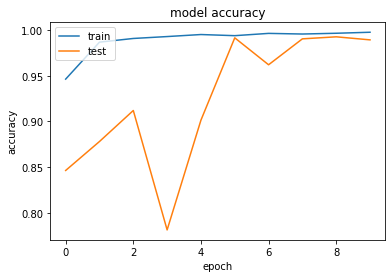

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

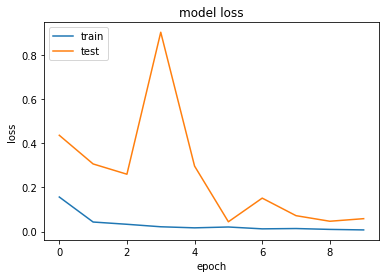

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 8. Predicting Images

In [21]:
from IPython.display import Image

def predict_img(model, img_path):
    image = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
    image_p = tf.keras.preprocessing.image.img_to_array(image)
    image_p = image_p.reshape((1, image_p.shape[0], image_p.shape[1], image_p.shape[2]))
    image_p = tf.keras.applications.mobilenet_v2.preprocess_input(image_p)
    pred = model.predict(image_p)
    confidence = max(pred[0])
    tag = np.where(pred[0] == confidence)
    print(f'Prediction is: {tags[tag[0][0]]}\nConfidence is: {confidence}')
    return Image(filename=img_path) 

Prediction is: with_mask
Confidence is: 0.9985128045082092


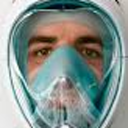

In [34]:
predict_img(model, './dataset/with_mask/1.png')

Prediction is: without_mask
Confidence is: 0.9698312878608704


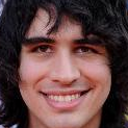

In [44]:
predict_img(model, './dataset/without_mask/9.png')

Prediction is: mask_weared_incorrect
Confidence is: 0.6310542821884155


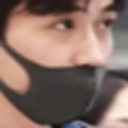

In [45]:
predict_img(model, './dataset/mask_weared_incorrect/2.png')

## 9. Summary

The Accuracy of Model is 95.27%